In [ ]:
import pickle
import umap
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the pickle file
# w2v2 xlsr 53 large
seed = "9001"
filename = "/home/projects/vokquant/accent-recog-slt2022/CommonAccent/results/W2V2/AT/wav2vec2-large-xlsr-53-augmented/" + seed + "/save/embeddings/embeddings_Stage.TEST.pkl"
# Initialize an empty list to store all loaded embeddings
loaded_embeddings = []

# Load the data from the pickle file
with open(filename, 'rb') as f:
    try:
        while True:
            # Append the loaded data to the list
            loaded_embeddings.extend(pickle.load(f))
    except EOFError:
        pass  # End of file reached

# # Check loaded data
# for id, embedding in loaded_embeddings:
#     print(f"ID: {id}, Embedding: {embedding.shape}")



# Get the embeddings
embeddings = np.array([embedding for id, embedding in loaded_embeddings])
print(embeddings.shape)
ids = np.array([id for id, embedding in loaded_embeddings])
print(ids.shape)
print("unique ids",np.unique(ids).shape)
labels = np.unique(ids)
print(type(ids))
print(labels)


(2598, 1024)
(2598,)
unique ids (5,)
<class 'numpy.ndarray'>
[0 2 3 4 5]


# Encode the dialect families

In [11]:
accent_encoder = '/home/projects/vokquant/accent-recog-slt2022/CommonAccent/results/W2V2/AT/wav2vec2-large-xlsr-53-augmented/' + seed + '/save/accent_encoder.txt'
with open(accent_encoder, 'r') as f:
    accent_encoder = f.read().splitlines()

encoder_dict = {}
for line in accent_encoder[:-2]:
    region, encoding = line.split(' => ')
    # print(region, encoding)
    encoder_dict[encoding] = (region.strip().strip("'"))
print(encoder_dict)

class_mapping = {}
for key, value in encoder_dict.items():
    class_mapping[value] = key
print(class_mapping)

# class_mapping = {
# '62390': 0, '70221': 1, '30860': 2, '31035': 3, '50413': 4, '41706': 5, '70709': 6, '80105': 7, '40719': 8, '70334': 9, '70406': 10, '31405': 11, '32210': 12, '70627': 13, '50304': 14, '70706': 15, '31207': 16, '40702': 17, '40423': 18, '40410': 19, '32309': 20, '41411': 21, '10702': 22, '70208': 23, '70734': 24, '50626': 25, '80225': 26, '30501': 27, '70622': 28, '40621': 29, '50621': 30, '62216': 31, '41342': 32, '61032': 33, '30910': 34, '10903': 35, '50617': 36, '31110': 37, '70615': 38, '20622': 39, '20914': 40, '80411': 41, '50612': 42, '50502': 43, '61627': 44, '32324': 45, '70516': 46, '10925': 47, '40806': 48, '80239': 49, '20321': 50, '80227': 51, '70804': 52, '80128': 53, '41804': 54, '31652': 55, '61257': 56, '30719': 57, '60350': 58, '50509': 59, '70402': 60, '20619': 61, '10401': 62, '61628': 63, '70824': 64, '70606': 65, '50206': 66, '61254': 67, '62105': 68, '31916': 69, '50210': 70, '40402': 71, '61115': 72, '70908': 73, '70419': 74, '70366': 75, '61743': 76, '32518': 77, '40914': 78, '31617': 79, '31401': 80, '50212': 81, '80212': 82, '41501': 83, '70326': 84, '40605': 85, '70362': 86, '70217': 87, '62144': 88, '10428': 89, '32519': 90, '10612': 91, '41102': 92, '50618': 93, '32002': 94, '50506': 95, '21002': 96, '62135': 97, '20604': 98, '61251': 99, '50423': 100, '31814': 101, '70825': 102, '31551': 103, '80109': 104, '31204': 105, '61756': 106, '70920': 107, '70504': 108
# }

# male_female_dict = { 31401: 'M', 30860: 'W', 41102: 'M', 40605: 'W', 62144: 'M', 61032: 'W', 20321: 'M', 21002: 'W', 50304: 'M', 50621: 'W', 70402: 'M', 70419: 'W', 80109: 'M', 80227: 'W', 10702: 'M', 10925: 'W'}

# class_mapping = {v: k for k, v in class_mapping.items()}
# print(class_mapping)
# # Loop through each key-value pair in the class_mapping dictionary
# for key, value in class_mapping.items():
#     # Convert the value to string to check the first digit
#     value_str = str(value)
#     # Check the first character of the value to determine the Bundesland
#     if value_str[0] == '1':
#         class_mapping[key] = f"{value_str} bgld"
#     elif value_str[0] == '2':
#         class_mapping[key] = f"{value_str} ktn"
#     elif value_str[0] == '3':
#         class_mapping[key] = f"{value_str} noe"
#     elif value_str[0] == '4':
#         class_mapping[key] = f"{value_str} ooe"
#     elif value_str[0] == '5':
#         class_mapping[key] = f"{value_str} sbg"
#     elif value_str[0] == '6':
#         class_mapping[key] = f"{value_str} stmk"
#     elif value_str[0] == '7':
#         class_mapping[key] = f"{value_str} t"
#     elif value_str[0] == '8':
#         class_mapping[key] = f"{value_str} vbg"
#     elif value_str[0] == '9':
#         class_mapping[key] = f"{value_str} w"
#     else:
#         print(f"error: Unrecognized first digit '{value_str[0]}' for key '{key}'")

#     # Check if the value is in the male_female_dict
#     if int(value) in male_female_dict:
#         # Append gender information from male_female_dict
#         class_mapping[key] = f"{class_mapping[key]} {male_female_dict[int(value)]}"

# print(class_mapping)

{'0': 'Süd-/Mittelbairisch', '1': 'Bairisch-Alemannisch', '2': 'Mittelbairisch', '3': 'Südbairisch', '4': 'Alemannisch', '5': '(West-)Mittelbairisch'}
{'Süd-/Mittelbairisch': '0', 'Bairisch-Alemannisch': '1', 'Mittelbairisch': '2', 'Südbairisch': '3', 'Alemannisch': '4', '(West-)Mittelbairisch': '5'}


In [18]:
print(class_mapping)
# ids = np.array([class_mapping[id] for id in ids])
print(ids)


{'Süd-/Mittelbairisch': '0', 'Bairisch-Alemannisch': '1', 'Mittelbairisch': '2', 'Südbairisch': '3', 'Alemannisch': '4', '(West-)Mittelbairisch': '5'}
[2 2 3 ... 2 0 0]


# Get region codes and coordinates

In [21]:
# csv_file = "/home/projects/vokquant/data/dicla/Reflist-2162-Österreichische-Ortschaften.csv"

# # Load the CSV file into a DataFrame
# df = pd.read_csv(csv_file, sep=',', encoding='utf-8')

# # Ortschaftskennzahl	Name	Postleitzahl: Postleitzahl	Gemeinde: Gemeindekennzahl	Gemeinde: Name
# header = ['Ortschaftskennzahl', 'Name', 'Postleitzahl', 'Gemeindekennzahl', 'Gemeinde']
# df.columns = header

# # make dictionary of Gemeindekennzahl and Gemeinde
# gemeinde_dict = dict(zip(df['Gemeindekennzahl'], df['Gemeinde']))
# print(gemeinde_dict)

# gemeinde_dict_test_list = [10702, 10925, 20321, 21002, 30860, 31401,
#                           40605, 41102, 50304, 50621, 61032, 62144,
#                           70402, 70419, 80109, 80227]


# gemeinde_dict_test = {k: gemeinde_dict[k] for k in gemeinde_dict_test_list}
# print(gemeinde_dict_test)


# Get Austrian map

In [8]:
import geopandas as gpd
import requests
import zipfile
import os
import io
import matplotlib.pyplot as plt
import osmnx as ox

# Step 1: Download the shapefile zip file
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
zip_file_path = "ne_110m_admin_0_countries.zip"

response = requests.get(url)
if response.status_code == 200:
    with open(zip_file_path, 'wb') as f:
        f.write(response.content)

# Step 2: Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("natural_earth_data")
os.remove(zip_file_path)
# Step 3: Load the shapefile using GeoPandas
shapefile_path = "natural_earth_data/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)
# Step 4: Filter for Austria
austria = world[world['NAME'] == 'Austria']

# Plot dialects in map

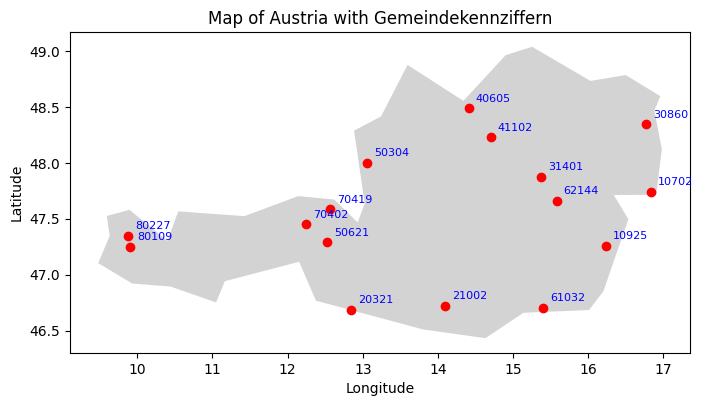

In [9]:
# Step 6: Get coordinates for each place using OSMnx
# add "M" or "W" in gemeinde_dict_test according to the dict male_female_dict
# for k, place in gemeinde_dict_test.items():
#     # print("k")
#     if k in male_female_dict.keys():
#         print(f"key found: {k}")
#         new_place = str(k) + " " + male_female_dict[k]
#         print(f"new place: {new_place}")
#         # update key in dict
        
coordinates = {}
for k, place in gemeinde_dict_test.items():
    location = ox.geocoder.geocode(f"{place}, Austria")
    if location:
        coordinates[k] = location
        # print(f"Coordinates of {place}: {location}")
    else:
        print(f"Location {place} not found")

# Step 7: Plot Austria and mark the locations
fig, ax = plt.subplots(figsize=(8, 8))
austria.plot(ax=ax, color='lightgray')

latitudes = [coord[0] for coord in coordinates.values()]
longitudes = [coord[1] for coord in coordinates.values()]

# Step 8: Mark the Gemeindekennziffern on the map
ax.scatter(longitudes, latitudes, color='red')

# Add annotations for each Gemeindekennziffern
for k, (lat, lon) in zip(coordinates.keys(), coordinates.values()):
    ax.annotate(k, xy=(lon, lat), xytext=(5, 5), textcoords='offset points', fontsize=8, color='blue')

plt.title('Map of Austria with Gemeindekennziffern')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



In [70]:
# Reduce the dimensionality of the embeddings
reducer = umap.UMAP(n_neighbors=100, min_dist=0.1, n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

# assign same color to same dialect 
# Define colors for each dialect
df = pd.DataFrame({
    'UMAP_1': embedding_2d[:, 0],
    'UMAP_2': embedding_2d[:, 1],
    'Dialect': ids.astype(str)  # Convert to string to ensure discrete color mapping
})
# {'0': 'Süd-/Mittelbairisch', '1': 'Bairisch-Alemannisch', '2': 'Mittelbairisch', '3': 'Südbairisch', '4': 'Alemannisch', '5': '(West-)Mittelbairisch'}

colors = []
for id in ids:
    if id == 0:
        colors.append("red")
    elif id == 1:
        colors.append("green")
    elif id == 2:
        colors.append("blue")
    elif id == 3:
        colors.append("purple")
    elif id ==4:
        colors.append("black")
    elif id == 5:
        colors.append("yellow")
    else:
        print(f"error: Unrecognized Dialektfamilie '{id}'")
        colors.append("brown")
df['color'] = colors
color_mapping = {dialect: color for dialect, color in zip(df['Dialect'], df['color'])}

print(df)
# Plot the embeddings with labels
plt.figure(figsize=(12, 10))

# for i, label in enumerate(np.unique(ids)):
#     idx = ids == label
#     # Get the colors for the specific subset of data points
#     color_subset = df.loc[idx, 'color'].values
#     plt.scatter(
#         embedding_2d[idx, 0], embedding_2d[idx, 1], 
#         label=f"{label}", s=20, 
#         c=color_subset, marker='o', alpha=1.0
#     )

for i, label in enumerate(np.unique(ids)):
    idx = ids == label
    # Get the colors for the specific subset of data points
    color_subset = df.loc[idx, 'color'].values
    
# plt.title("UMAP Projection of Dialect Embeddings", fontsize=16)
# plt.xlabel("UMAP Dimension 1", fontsize=12)
# plt.ylabel("UMAP Dimension 2", fontsize=12)

# # Add legend with smaller size
# plt.legend(loc='best', fontsize=10, markerscale=1.5)
# plt.grid(True)
# plt.show()


/home/lorenzg/miniconda3/envs/dicla_torch/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



         UMAP_1     UMAP_2 Dialect   color
0      6.624886   5.570021       2    blue
1     12.265527   1.767490       2    blue
2     18.682274   9.324845       3  purple
3      6.871747   5.553462       0     red
4      5.798309   4.470211       0     red
...         ...        ...     ...     ...
2593  18.792904  12.922172       4   black
2594  19.007364  12.641350       4   black
2595  14.302987   1.984693       2    blue
2596   4.144456   4.676674       0     red
2597   4.953414   5.244237       0     red

[2598 rows x 4 columns]


<Figure size 1200x1000 with 0 Axes>

In [65]:
print(ids)
# get labels from class_mapping
print(class_mapping)
clas_mapping_reverse = {v: k for k, v in class_mapping.items()}
#clas_mapping_reverse = {'0': 'Süd-/Mittelbairisch', '1': 'Bairisch-Alemannisch', '2': 'Mittelbairisch', '3': 'Südbairisch', '4': 'Alemannisch', '5': '(West-)Mittelbairisch'}

print(clas_mapping_reverse)	
labels = np.array([clas_mapping_reverse[str(id)] for id in ids])
print(labels)

[2 2 3 ... 2 0 0]
{'Süd-/Mittelbairisch': '0', 'Bairisch-Alemannisch': '1', 'Mittelbairisch': '2', 'Südbairisch': '3', 'Alemannisch': '4', '(West-)Mittelbairisch': '5'}
{'0': 'Süd-/Mittelbairisch', '1': 'Bairisch-Alemannisch', '2': 'Mittelbairisch', '3': 'Südbairisch', '4': 'Alemannisch', '5': '(West-)Mittelbairisch'}
['Mittelbairisch' 'Mittelbairisch' 'Südbairisch' ... 'Mittelbairisch'
 'Süd-/Mittelbairisch' 'Süd-/Mittelbairisch']


In [71]:
import plotly.express as px
import pandas as pd

# Convert 'ids' to categorical for distinct color mapping
df = pd.DataFrame({
    'UMAP_1': embedding_2d[:, 0],
    'UMAP_2': embedding_2d[:, 1],
    'Dialect': [clas_mapping_reverse[str(i)] for i in ids]  # Convert IDs to labels
})

# Create the interactive scatter plot with the color mapping
fig = px.scatter(
    df,
    x='UMAP_1',
    y='UMAP_2',
    color='Dialect',  # Color points by dialect (discrete values)
    title="UMAP Projection of Dialect Embeddings",
    labels={'UMAP_1': 'UMAP Dimension 1', 'UMAP_2': 'UMAP Dimension 2'},
    template='plotly_white',
    category_orders={'Dialect': sorted(df['Dialect'].unique())},  # Ensure consistent ordering of dialects
    color_discrete_map=color_mapping  # Use the color mapping for discrete colors
)

# Customize marker size and transparency
fig.update_traces(marker=dict(size=6, opacity=0.9))
fig.update_layout(legend_title_text='Dialect')
# in legend show the dialects
fig.update_traces(text=labels)
# Start with all traces unchecked
# fig.for_each_trace(lambda trace: trace.update(visible='legendonly'))
fig.show()


In [68]:
import umap
import plotly.express as px
import pandas as pd

# Reduce to 3D
reducer = umap.UMAP(n_neighbors=50, min_dist=0.05, n_components=3, random_state=42)
embedding_3d = reducer.fit_transform(embeddings)

# Convert 'ids' to categorical for distinct color mapping
df = pd.DataFrame({
    'UMAP_1': embedding_3d[:, 0],
    'UMAP_2': embedding_3d[:, 1],
    'UMAP_3': embedding_3d[:, 2],
    'Dialect': ids.astype(str)  # Convert to string to ensure discrete color mapping
})

# Create the interactive 3D scatter plot with discrete colors for each dialect
fig = px.scatter_3d(
    df,
    x='UMAP_1',
    y='UMAP_2',
    z='UMAP_3',
    color='Dialect',  # Color points by dialect (discrete values)
    title="3D UMAP Projection of Dialect Embeddings",
    labels={'UMAP_1': 'UMAP Dimension 1', 'UMAP_2': 'UMAP Dimension 2', 'UMAP_3': 'UMAP Dimension 3'},
    template='plotly_white',
    category_orders={'Dialect': sorted(df['Dialect'].unique())},  # Ensure consistent ordering of dialects
)

# Customize marker size and transparency
fig.update_traces(marker=dict(size=4, opacity=0.7))
fig.update_layout(legend_title_text='Dialect')

# Start with all traces unchecked
# fig.for_each_trace(lambda trace: trace.update(visible='legendonly'))

# Show the interactive plot
fig.show()


/home/lorenzg/miniconda3/envs/dicla_torch/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

